# Introducing RNNs
RNNs are widely applied for use cases that involve sequential data, such as time series, text, audio, speech, video, weather, and much more. They have been greatly used in various natural language processing (NLP) tasks, such as language translation, sentiment analysis, text generation, and so on.


RNN predict output not only based on the current input, but also on the previous hidden state. The previous hidden state acts like a memory and it captures the context of the sentence. With this context and the current input, we can predict the relevant word.

## Forward propagation in RNNs
RNN uses forward propagation to predict the output.
The preceding figure illustrates the following:
- U represents the input to hidden layer weight matrix
- W represents the hidden to hidden layer weight matrix
- V  represents the hidden to output layer weight matrix

In [1]:
import numpy as np

# Define the dimensions
input_dim = 10  # The dimension of the input
hidden_dim = 8  # The dimension of the hidden state
output_dim = 5  # The dimension of the output

# Initialize the weights using the uniform distribution
U = np.random.uniform(
    -np.sqrt(1.0 / input_dim), np.sqrt(1.0 / input_dim), (hidden_dim, input_dim)
)
W = np.random.uniform(
    -np.sqrt(1.0 / hidden_dim), np.sqrt(1.0 / hidden_dim), (hidden_dim, hidden_dim)
)
V = np.random.uniform(
    -np.sqrt(1.0 / hidden_dim), np.sqrt(1.0 / hidden_dim), (output_dim, hidden_dim)
)

# Define a random input sequence
x = np.random.randint(0, input_dim, size=15)  # Example input sequence of length 15
num_time_steps = len(x)

# Initialize the hidden state
hidden_state = np.zeros((num_time_steps + 1, hidden_dim))
hidden_state[-1] = np.zeros(hidden_dim)

# Initialize the output
YHat = np.zeros((num_time_steps, output_dim))


# Softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z))  # Stability improvement by subtracting max
    return exp_z / exp_z.sum(axis=0)


# Forward pass for each time step
for t in np.arange(num_time_steps):
    # Compute the hidden state at time t
    hidden_state[t] = np.tanh(U[:, x[t]] + W.dot(hidden_state[t - 1]))
    # Compute the output at time t
    YHat[t] = softmax(V.dot(hidden_state[t]))

# Display the final output
print("YHat:")
print(YHat)

YHat:
[[0.19492279 0.17353514 0.24459266 0.22929532 0.15765409]
 [0.18572061 0.20539911 0.23331536 0.19244974 0.18311518]
 [0.18770727 0.22029994 0.18444062 0.1854183  0.22213388]
 [0.22157655 0.17218015 0.20865046 0.19869341 0.19889944]
 [0.21493007 0.17450505 0.16965643 0.22768529 0.21322315]
 [0.19471596 0.21251485 0.18431497 0.18976308 0.21869113]
 [0.20252165 0.1868734  0.21659048 0.19427322 0.19974125]
 [0.19762553 0.1972614  0.17389066 0.24166912 0.18955328]
 [0.20753333 0.18808519 0.20747291 0.22186451 0.17504406]
 [0.18206537 0.21122042 0.20856465 0.18841831 0.20973125]
 [0.18261961 0.20889559 0.21573444 0.1830653  0.20968506]
 [0.20032081 0.19680268 0.18191244 0.20213823 0.21882584]
 [0.19639334 0.21788882 0.16358175 0.2228223  0.19931379]
 [0.21227118 0.17456996 0.21061558 0.2260651  0.17647817]
 [0.19832079 0.19504612 0.21270813 0.19977715 0.19414781]]


# Generating song lyrics using RNNs
We have learned enough about RNNs; now, we will look at how to generate
song lyrics using RNNs. To do this, we simply build a character-level RNN,
meaning that on every time step, we predict a new character.

Let's consider a small sentence, What a beautiful **d**.

At the first time step, the RNN predicts a new character as a. The sentence
will be updated to, What a beautiful **da**.

At the next time step, it predicts a new character as y, and the sentence
becomes, What a beautiful **day**.

In this manner, we predict a new character at each time step and generate a
song. Instead of predicting a new character every time, we can also predict a
new word every time, which is called **word level RNN**. For simplicity, let's
start with a **character level RNN.**

But how does RNN predicts a new character on each time step? Let's
suppose at a time step t=0, we feed an input character say x. Now the RNN
predicts the next character based on the given input character x. To predict
the next character, it predicts the probability of all the characters in our
vocabulary to be the next character. Once we have this probability
distribution we randomly select the next character based on this probability.

For instance, as shown in the following figure, let's suppose that our
vocabulary contains four characters L, O, V, and E; when we feed the
character L as an input, RNN computes the probability of all the words in the
vocabulary to be the next character:

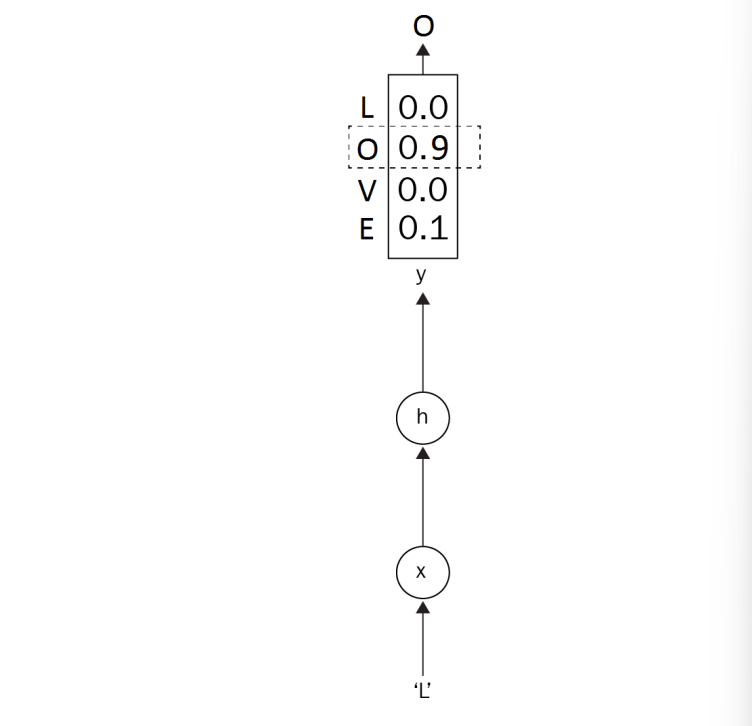

## Implementing in TensorFlow

In [2]:
import warnings

warnings.filterwarnings("ignore")
import random
import pandas as pd
import numpy as np
import tensorflow as tf

tf.get_logger().setLevel("ERROR")  # Updated logging method
import warnings

warnings.filterwarnings("ignore")
import warnings

warnings.filterwarnings("ignore")

### Data preparation

In [3]:
df = pd.read_csv("data/songdata.csv")
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [4]:
df.shape[0]

57650

In [5]:
len(df["artist"].unique())

643

In [6]:
df["artist"].value_counts()[:10]

artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Cher                187
Alabama             187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64

In [7]:
df["artist"].value_counts().values.mean()

89.65785381026438

In [8]:
data = ", ".join(df["text"])

In [9]:
data[:369]

"Look at her face, it's a wonderful face  \nAnd it means something special to me  \nLook at the way that she smiles when she sees me  \nHow lucky can one fellow be?  \n  \nShe's just my kind of girl, she makes me feel fine  \nWho could ever believe that she could be mine?  \nShe's just my kind of girl, without her I'm blue  \nAnd if she ever leaves me what could I do, what co"

In [10]:
chars = sorted(list(set(data)))
vocab_size = len(chars)
char_to_ix = {ch: i for i, ch in enumerate(chars)}
ix_to_char = {i: ch for i, ch in enumerate(chars)}
print(char_to_ix["s"])

68


In [11]:
print(ix_to_char[68])

s


In [12]:
vocabSize = 7
char_index = 4
print(np.eye(vocabSize)[char_index])

[0. 0. 0. 0. 1. 0. 0.]


In [13]:
def one_hot_encoder(index):
    return np.eye(vocab_size)[index]

### Defining the network parameters

In [14]:
# Define the number of units in the hidden layer
hidden_size = 100

# Define the length of the input and output sequence
seq_length = 25

# Define the learning rate for gradient descent
learning_rate = 1e-1

# Set the seed value
seed_value = 42
tf.random.set_seed(seed_value)
random.seed(seed_value)


### Defining placeholders

In [15]:
tf.compat.v1.disable_eager_execution()

# placeholders for the input and output
inputs = tf.compat.v1.placeholder(shape=[None, vocab_size], dtype=tf.float32, name="inputs")
targets = tf.compat.v1.placeholder(shape=[None, vocab_size], dtype=tf.float32, name="targets")

# the placeholder for the initial hidden state
init_state = tf.compat.v1.placeholder(shape=[1, hidden_size], dtype=tf.float32, name="state")

# initializer for initializing the weights of the RNN
initializer = tf.random_normal_initializer(stddev=0.1)


### Defining forward propagation

In [16]:
import tensorflow as tf

# Define the forward propagation within a variable scope named "RNN"
with tf.compat.v1.variable_scope("RNN") as scope:
    h_t = init_state  # Initialize the hidden state as the initial state
    y_hat = []  # To store the outputs at each time step

    # Iterate through each time step of the sequence
    for t, x_t in enumerate(tf.split(inputs, seq_length, axis=0)):
        if t > 0:
            scope.reuse_variables()  # Reuse variables after the first time step

        # Define weight matrices for input-to-hidden, hidden-to-hidden, and hidden-to-output layers
        U = tf.compat.v1.get_variable("U", [vocab_size, hidden_size], initializer=initializer)
        W = tf.compat.v1.get_variable("W", [hidden_size, hidden_size], initializer=initializer)
        V = tf.compat.v1.get_variable("V", [hidden_size, vocab_size], initializer=initializer)

        # Define biases for the hidden and output layers
        bh = tf.compat.v1.get_variable("bh", [hidden_size], initializer=initializer)
        by = tf.compat.v1.get_variable("by", [vocab_size], initializer=initializer)

        # Calculate the new hidden state using the input x_t and the previous hidden state h_t
        h_t = tf.tanh(tf.matmul(x_t, U) + tf.matmul(h_t, W) + bh)

        # Calculate the output y_hat_t for the current time step
        y_hat_t = tf.matmul(h_t, V) + by
        y_hat.append(y_hat_t)  # Append the output to the y_hat list

# Apply softmax to the final output to get probabilities
output_softmax = tf.nn.softmax(y_hat[-1])
outputs = tf.concat(y_hat, axis=0)

# Compute the cross-entropy loss between the outputs and the targets
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=targets, logits=outputs))

# Store the final hidden state of the RNN, which can be used for predictions or further processing
hprev = h_t

### Defining Back Propagation Through Time

In [17]:
import tensorflow as tf

# Initialize the Adam optimizer
minimizer = tf.compat.v1.train.AdamOptimizer()

# Compute the gradients of the loss with the Adam optimizer
gradients = minimizer.compute_gradients(loss)

# Set the threshold for gradient clipping
threshold = tf.constant(5.0, name="grad_clipping")

# Clip the gradients that exceed the threshold and bring them within the range
clipped_gradients = []
for grad, var in gradients:
    if grad is not None:  # Check if the gradient is not None
        clipped_grad = tf.clip_by_value(grad, -threshold, threshold)
        clipped_gradients.append((clipped_grad, var))

# Apply the clipped gradients to update the model's variables
updated_gradients = minimizer.apply_gradients(clipped_gradients)


### Start generating songs

In [19]:
import numpy as np
import tensorflow as tf
import random

# Initialize TensorFlow session and variables
sess = tf.compat.v1.Session()
init = tf.compat.v1.global_variables_initializer()
sess.run(init)


# Dataset and pointer initialization
pointer = 0

# Define input and output data
input_sentence = data[pointer:pointer + seq_length]
input_sentence

"Look at her face, it's a "

In [20]:
output_sentence = data[pointer + 1:pointer + seq_length + 1]
output_sentence

"ook at her face, it's a w"

In [22]:
sample_length = 500

for iteration in range(500001):
    if pointer + seq_length+1 >= len(data) or iteration == 0:
        hprev_val = np.zeros([1, hidden_size])
        pointer = 0
    
    input_sentence = data[pointer:pointer + seq_length]
    output_sentence = data[pointer + 1:pointer + seq_length + 1]

    # Convert sentences to indices
    input_indices = [char_to_ix[ch] for ch in input_sentence]
    target_indices = [char_to_ix[ch] for ch in output_sentence]

    # Convert indices to one-hot vectors
    input_vector = one_hot_encoder(input_indices)
    target_vector = one_hot_encoder(target_indices)
        
    hprev_val, loss_val, _ = sess.run(
        [hprev, loss, updated_gradients],
        feed_dict={
            inputs: input_vector,
            targets: target_vector,
            init_state: hprev_val
        }
    )

    # Generate song lyrics every 50,000 iterations
    if iteration % 50000 == 0:
        random_index = random.randint(0, len(data) - seq_length)
        sample_input_sent = data[random_index:random_index + seq_length]
        sample_input_indices = [char_to_ix[ch] for ch in sample_input_sent]
        sample_prev_state_val = np.copy(hprev_val)
        predicted_indices = []

        for t in range(sample_length):
            sample_input_vector = one_hot_encoder(sample_input_indices)
            probs_dist, sample_prev_state_val = sess.run(
                [output_softmax, hprev],
                feed_dict={
                    inputs: sample_input_vector,
                    init_state: sample_prev_state_val
                }
            )

            ix = np.random.choice(range(len(char_to_ix)), p=probs_dist.ravel())
            sample_input_indices = sample_input_indices[1:] + [ix]
            predicted_indices.append(ix)

        predicted_chars = [ix_to_char[ix] for ix in predicted_indices]
        text = ''.join(predicted_chars)
        print('\n')
        print(f'After {iteration} iterations')
        print('\n', text, '\n')
        print('-' * 115)

    pointer += seq_length
    iteration += 1



After 0 iterations

 A1dAT3!GdpJ"3.7z 7 !XROjp][762T7Zy,UyCbz,:Hk(Woi]upLSyAL(bN1,-u0ZyZd ,PgwM)
9gwu9H8f(V?Oti!K"ob)ubx62)!2OD
M'V5QU7UuneY5(C7K.B
Z'7HxYcr"V47dkg 5a0QbB2
bS:"ce"-UHfpP"OG!LoZfO
J0H-bT0?"
b9"j-NdRP 'JMuXYVlQ1-KGO.AwnGI8f-d5T gb8W[CnN2s1Wr"coMxLf2NvzjRU7SbsVXl'8jXjAc()G:9O6W[]'3gXYW?p9:aZ0Qj.COtUQoqP"vTzQ.IDSKu?R1W,[CCI R1:tldcynX4?l8Qr --KCDcI]dG'RRm3EgwglqPncXfkA1MAr6b[3(IpuYFa[mWQ(LxMY0jC0o20KFeRU4r5PdE,!XqA55AP(H5i
LXRt?j'LONKYScrOM!6unszECIEdDW"-NN5gXW,Z,!6xC3h9!N1OVnk,SHZHeMZBnaGtM,c:WfCImffuuY 

-------------------------------------------------------------------------------------------------------------------


After 50000 iterations

  lay  
A dan't kind  
That 'r?  
Mo's brusth  
N, dn'ckee, I raid!  
Then mao:]  
[. rolly, "Ren trid me, it dom takes of dean. upch arrain:]  
You fon here is life inther me...  
[The upin Know  
[Hras a rrow stickers.]  
[Brdring  
For will  
Your hay ser !

, Meings o fruemf eving (  
[3 need my ever.  
[?d bes m ck prech:]  


### Different types of RNN architectures

Here, we will look at a different type of RNN architecture that's based on numbers of input and output.

## 1. One-to-one architecture ##
In a one-to-one architecture, a single input is mapped to a single output, and the output from the time step t is fed as an input to the next time step. we take the output generated from a
current time step and feed it as the input to the next time step to generate the next word.

The following figure shows the one-to-one RNN architecture.

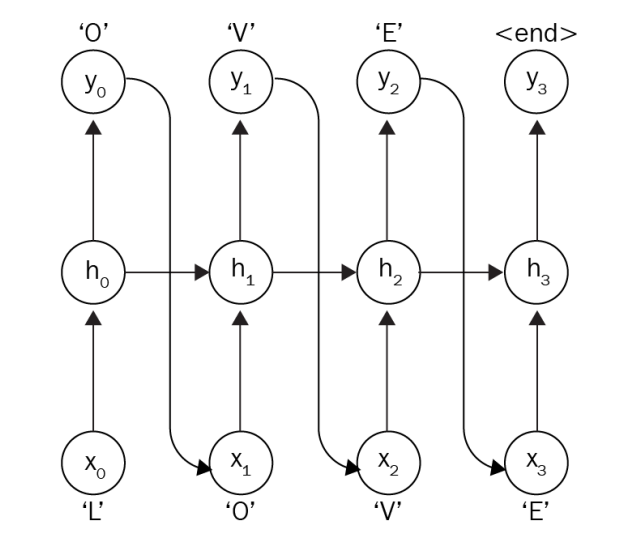

## 2. One-to-many architecture ##

In a one-to-many architecture, a single input is mapped to multiple hidden states and multiple output values, which means RNN takes a single input and maps it to an output sequence. Such application of this architecture is image caption generation.

As shown in the following figure, a single image is passed as an input to the RNN, and at the first time step,t_0 , the word Horse is predicted; on the next time step,t_1 , the previous hidden state Beta_1 is used to predict the next word which is **standing**. Similarly, it continues for a sequence of steps and predicts the next word until the caption is generated:

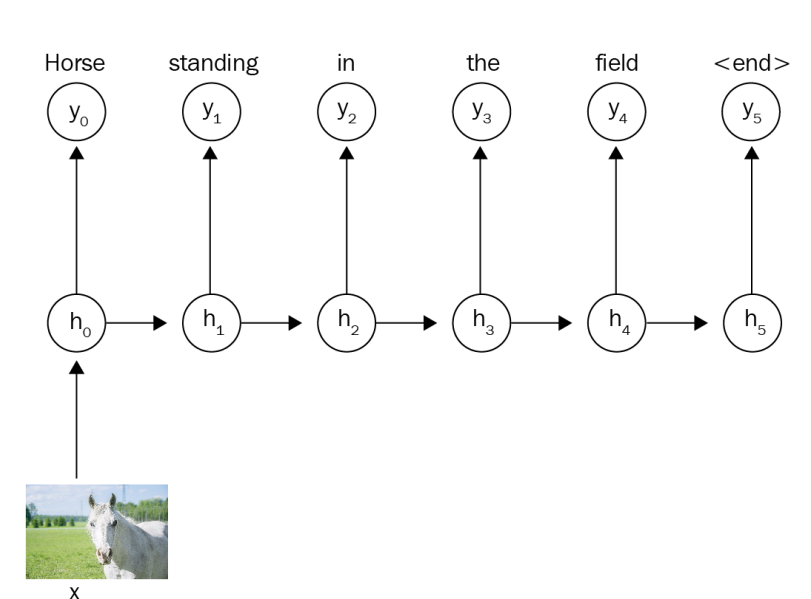

## 3. Many-to-one architecture ##

A many-to-one architecture, as the name suggests, takes a sequence of input and maps it to a single output value. One such popular example of a many-to-one is **sentiment classification**. A sentence is a sequence of words, so on each time step, we pass each word as input and predict the output at the final time step.

As shown in the following figure, at each time step, a single word is passed as an input, along with the previous hidden state; and, at the final time step, it predicts the sentiment of the sentence:

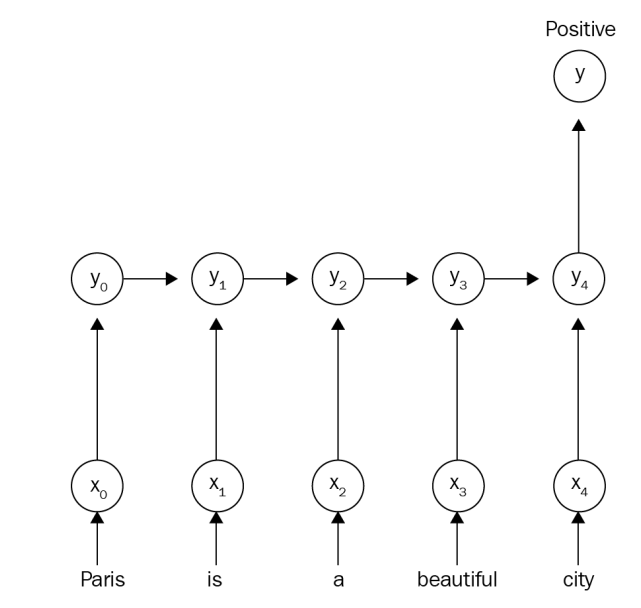

## 4. Many-to-Many architecture ##
In many-to-many architectures, we map a sequence of input of arbitrary length to a sequence of output of arbitrary length. This architecture has been used in various applications. Some of the popular applications of many-to-many architectures include language translation, conversational bots, and audio generation.

Let's suppose that we are converting a sentence from English to French :

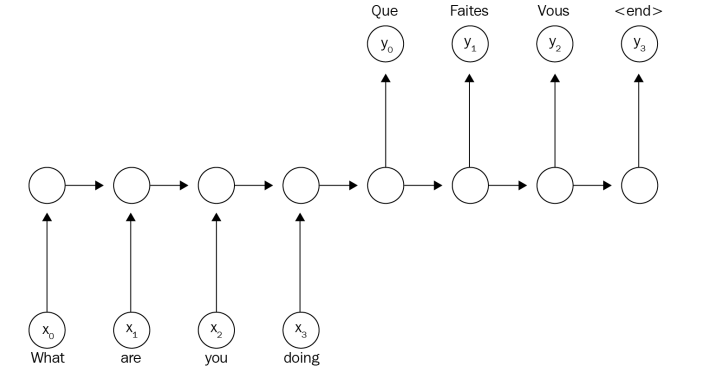